In [1]:
import numpy as np
import pandas as pd
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from descartes import PolygonPatch

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, Point
import rtree as rt

import os
import glob
import sys
module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
Ano = '2018'
Mes = '03'

In [4]:
if Mes == '01':
    Mes_name = 'Enero'
    num_dias = 31
    ds = 1
    de = 31
    
elif Mes == '02':
    Mes_name = 'Febrero'
    if Ano == '2020':
        num_dias = 29
        ds = 1
        de = 29
    else:
        num_dias = 28
        ds = 1
        de = 28
        
elif Mes == '03':
    Mes_name = 'Marzo'
    num_dias = 31
    ds = 1
    de = 31
    
elif Mes == '04':
    Mes_name = 'Abril'
    num_dias = 30
    ds = 1
    de = 30
    
elif Mes == '05':
    Mes_name = 'Mayo'
    num_dias = 31
    ds = 1
    de = 31
    
elif Mes == '06':
    Mes_name = 'Junio'
    num_dias = 30
    ds = 1
    de = 30
    
elif Mes == '07':
    Mes_name = 'Julio'
    num_dias = 31
    ds = 1
    de = 31
    
elif Mes == '08':
    Mes_name = 'Agosto'
    num_dias = 31
    ds = 1
    de = 31
    
elif Mes == '09':
    Mes_name = 'Septiembre'
    num_dias = 30
    ds = 1
    de = 30
    
elif Mes == '10':
    Mes_name = 'Octubre'
    num_dias = 31
    ds = 1
    de = 31
    
elif Mes == '11':
    Mes_name = 'Noviembre'
    num_dias = 30
    ds = 1
    de = 30
    
elif Mes == '12':
    Mes_name = 'Diciembre'
    num_dias = 31
    ds = 1
    de = 31
    
tempos = num_dias*24
print('Ano: ',Ano)
print('Mes: ',Mes_name)
print('Numero de tiempos:',tempos)

Ano:  2018
Mes:  Marzo
Numero de tiempos: 744


In [5]:
# America do Sul
resolution = 0.5
grid_r = '05x05'

# resolution = 1
# grid_r = '1x1'

print('Resolucion: ',grid_r)

# America do Sul
lon_new = np.arange(-85,-30,resolution)
lat_new = np.arange(-45,10,resolution)
# Grilla America do Sul
lons = np.arange(-85,-30+resolution,resolution)
lats = np.arange(-45,10+resolution,resolution)

# # Sao Paulo
# resolution = 14/111
# lon_new = np.arange(-49,-45,resolution)
# lat_new = np.arange(-25,-21,resolution)
# # Grilla Sao Paulo
# lons = np.arange(-49,-45+resolution,resolution)
# lats = np.arange(-25,-21+resolution,resolution)

grids = list()
for lat in range(lats.size-1):
    for lon in range(lons.size-1):
        lu = Point(lons[lon], lats[lat])
        ru = Point(lons[lon+1], lats[lat])
        rb = Point(lons[lon+1], lats[lat+1])
        lb = Point(lons[lon], lats[lat+1])
        poly = Polygon((lu, ru, rb, lb, lu))
        grids.append(poly)

grid = np.reshape(grids, (lats.size-1, lons.size-1))

Resolucion:  05x05


In [15]:
# lista = glob.glob('/mnt/Data/GLM/Data/5min/*.csv')
lista = glob.glob('/mnt/Data/Data/GLM/SA/Point/'+Ano+'/'+Mes+'/*.csv')
lista = sorted(lista)
tempos = len(lista)
print(tempos)

2976


In [19]:
Densidad = np.zeros([tempos,len(lat_new),len(lon_new)])
count = 0
for i in range(tempos): 

    if os.path.exists(lista[i]):

        if i % 100 == 0 or i == tempos-1:
            print(i,'de',tempos,' ',lista[i])

        data_in = pd.read_csv(lista[i])
        data = pd.DataFrame({'Lat':data_in['Lat'],'Lon':data_in['Lon']})

        tree = rt.index.Index()

        for i, row in data.iloc[:,:].iterrows():
            tree.insert(i, Point(row.Lon, row.Lat).bounds)

        mapping = list()

        for g in grids:
            matches = list(tree.intersection(g.bounds))
            mapping.append(len(matches))

        density = np.reshape(mapping, (lats.size-1, lons.size-1))

    else:
        print('   ',lista[i],'No Existe')
        density = np.zeros([len(lat_new),len(lon_new)])

    Densidad[count,:,:] = density
    count = count + 1

0 de 2976   /mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_00_00_14.csv
100 de 2976   /mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_02_01_00_14.csv
200 de 2976   /mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_03_02_00_14.csv


In [ ]:
file_name_out = '/mnt/Data/Data/GLM/SA/Grid/GLM_'+Ano+'_'+Mes+'_hourly_'+grid_r+'.nc'
print(file_name_out)

../Data/grid/1h/GLM_2021_02_hourly_05x05.nc


In [13]:
info = {'file': file_name_out,
        'title': 'GLM flash 0.5x0.5', 
        'year_start':int(Ano),'month_start':int(Mes),'day_start':ds,'hour_start':0,'minute_start':0,
        'year_end':int(Ano),'month_end':int(Mes),'day_end':de,'hour_end':23,'minute_end':59,
        'time_frequency': 'minutely', 
        'time_interval': 15,
        'var_name': 'flash', 
        'var_units': 'flash/0.5x0.5'} 

In [14]:
ca.create_netcdf(info,lat_new,lon_new,Densidad)

Time Start: 2021-02-01 00:00:00
Time End: 2021-02-28 23:00:00
Time Frequency: hourly
Time Lenght: 672

File created in:  ../Data/grid/1h/GLM_2021_02_hourly_05x05.nc
File title:  Brasildat data 14km x 14km
var title:  flash
var units:  flash/196km2


In [15]:
lon2d, lat2d = np.meshgrid(lon_new,lat_new)
test_sum = np.sum(Densidad,axis=0)

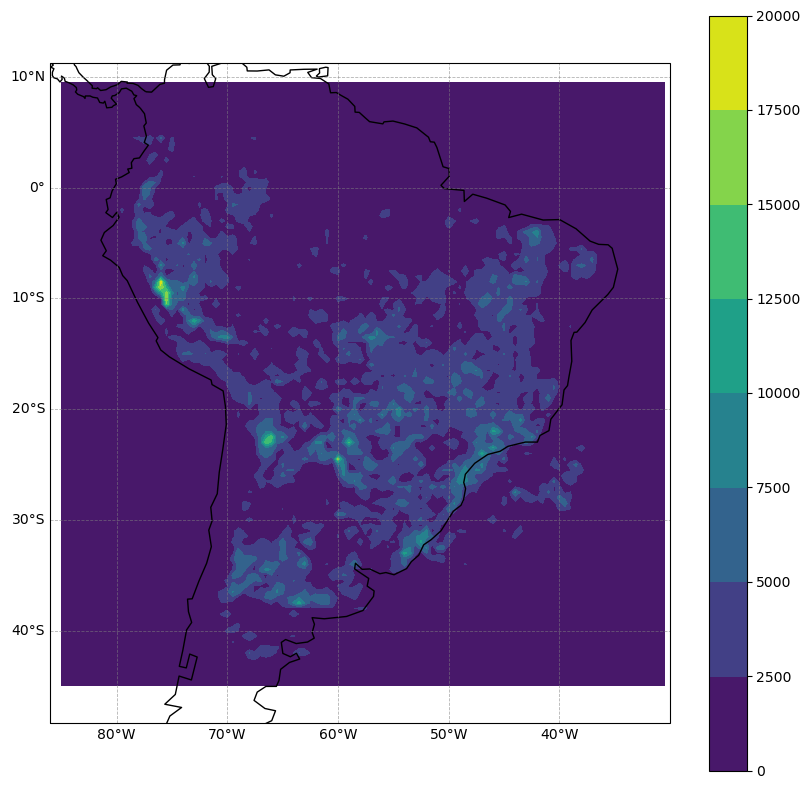

In [16]:
fig = plt.figure(figsize=(10,10),dpi=100)
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines()

ax.set_extent([-86,-30,-45,10])

# ax.contourf(lon_new,lat_new,Densidad[200,:,:])
a1 = ax.contourf(lon_new,lat_new,test_sum)

plt.colorbar(a1)

gl = ax.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False